In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

Коды валют и котировки на данный момент

In [3]:
url1 = 'http://www.cbr.ru/scripts/XML_daily.asp?date_req=20/06/2025'
pd.read_xml(url1, encoding='cp1251')

,ID,NumCode,CharCode,Nominal,Name,Value,VunitRate
0,R01010,36,AUD,1,Австралийский доллар,"50,7477","50,7477"
1,R01020A,944,AZN,1,Азербайджанский манат,"46,1670","46,167"
2,R01035,826,GBP,1,Фунт стерлингов,"105,5765","105,5765"
3,R01060,51,AMD,100,Армянских драмов,"20,3955","0,203955"
4,R01090B,933,BYN,1,Белорусский рубль,"26,3696","26,3696"
5,R01100,975,BGN,1,Болгарский лев,"46,1795","46,1795"
6,R01115,986,BRL,1,Бразильский реал,"14,3020","14,302"
7,R01135,348,HUF,100,Форинтов,"22,3512","0,223512"
8,R01150,704,VND,10000,Донгов,"31,3622","0,00313622"
9,R01200,344,HKD,1,Гонконгский доллар,"10,0158","10,0158"


Курс доллара

In [4]:
url = 'https://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=01/01/2017&date_req2=01/06/2025&VAL_NM_RQ=R01235'
df = pd.read_xml(url)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # дата в формате дд.мм.гггг
df = df.set_index("Date")
df['usd_rub'] = df['VunitRate'].str.replace(',', '.').astype(float)

df.drop(["Id", "Nominal", "Value", 'VunitRate'], axis=1, inplace = True)
print(df)

            usd_rub
Date               
2017-01-10  59.8961
2017-01-11  59.9533
2017-01-12  60.1614
2017-01-13  59.4978
2017-01-14  59.3700
...             ...
2025-05-27  79.6588
2025-05-28  79.6176
2025-05-29  79.6037
2025-05-30  78.4970
2025-05-31  78.6171

[2071 rows x 1 columns]


<Axes: xlabel='Date'>

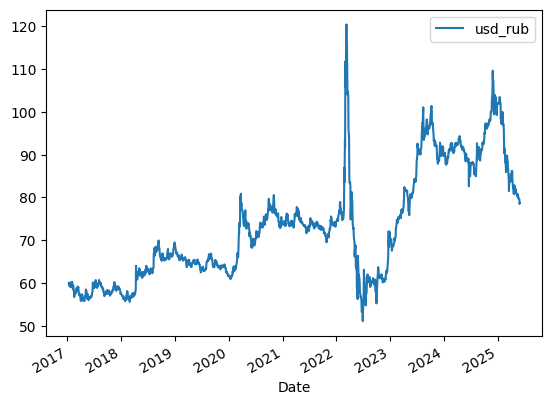

In [5]:
df.plot()

<Axes: xlabel='Date'>

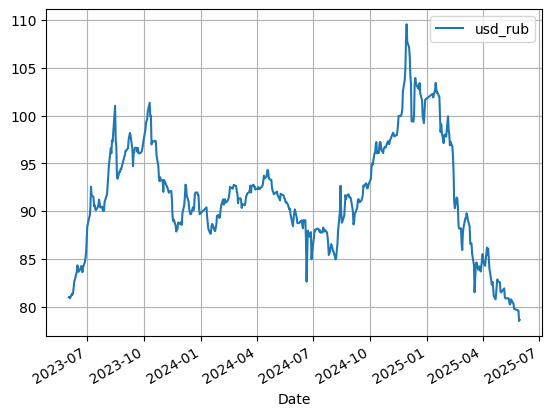

In [6]:
df_cut = df.loc['2023-06-01':'2025-06-01']
df_cut.plot(grid=True)

Очистка данных

In [7]:
def find_anomaly(data_value, window_mean):
    diff = abs(data_value - window_mean) / data_value
    return(diff > 0.1)

In [8]:
w = 7
windows = df_cut.rolling(w).mean()
windows.dropna(inplace = True)
df_clear = pd.DataFrame(columns=['usd_rub'])
for date in windows.index:
    if find_anomaly(df_cut.loc[date, 'usd_rub'], windows.loc[date, 'usd_rub']):
        df_clear.loc[date] = windows.loc[date]
    else:
        df_clear.loc[date] = df_cut.loc[date]
df_clear

,usd_rub
2023-06-09,82.0930
2023-06-10,82.6417
2023-06-14,83.6405
2023-06-15,84.3249
2023-06-16,83.9611
...,...
2025-05-27,79.6588
2025-05-28,79.6176
2025-05-29,79.6037
2025-05-30,78.4970


<Axes: >

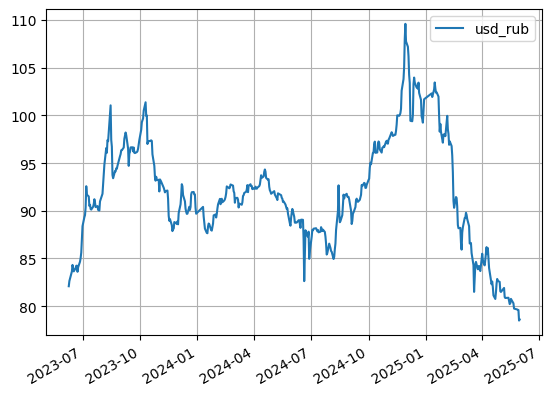

In [9]:
df_clear.plot(grid=True)

Оценка стационарности

In [10]:
result = adfuller(df_clear['usd_rub'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Результат: ряд {"стационарен" if result[1] < 0.05 else "нестационарен"}')

ADF Statistic: -1.7895631149436118
p-value: 0.38565548998998667
Результат: ряд нестационарен


In [11]:
result = kpss(df_clear['usd_rub'], regression='c', nlags='auto')
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Результат: ряд {"стационарен" if result[1] > 0.05 else "нестационарен"}')

KPSS Statistic: 0.23820709208692778
p-value: 0.1
Результат: ряд стационарен


C:\Users\user\AppData\Local\Temp\ipykernel_7840\4067363791.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df_clear['usd_rub'], regression='c', nlags='auto')


Оценка автокорреляции

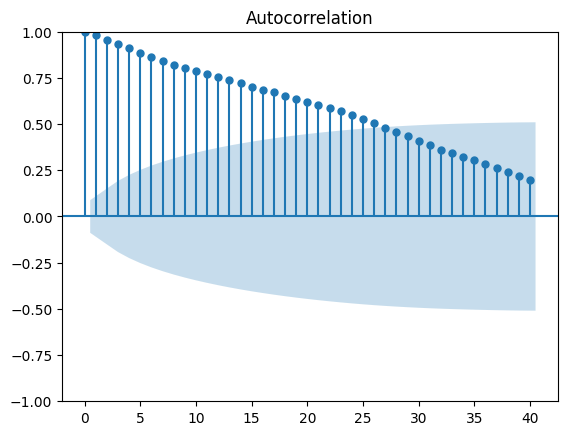

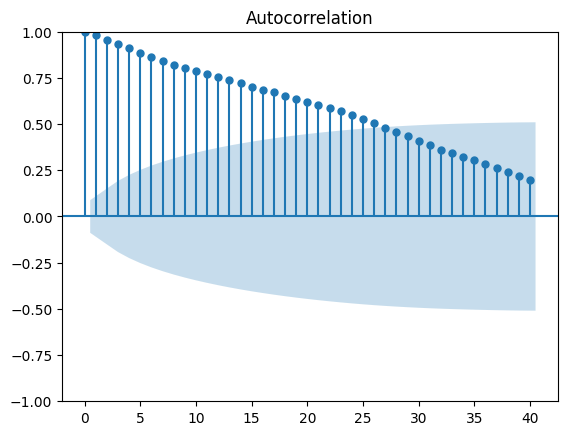

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_clear['usd_rub'], lags=40)

Ряд нестационарен - нужно дифференцировать

<Axes: >

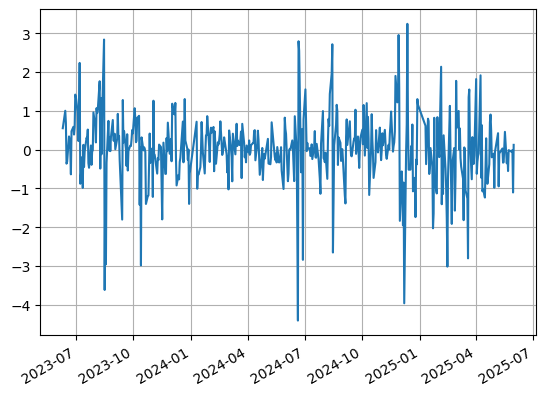

In [13]:
df_diffed = df_clear['usd_rub'].diff().dropna()
df_diffed.plot(grid=True)

In [14]:
df_diffed

2023-06-10    0.5487
2023-06-14    0.9988
2023-06-15    0.6844
2023-06-16   -0.3638
2023-06-17   -0.3113
               ...  
2025-05-27   -0.0520
2025-05-28   -0.0412
2025-05-29   -0.0139
2025-05-30   -1.1067
2025-05-31    0.1201
Name: usd_rub, Length: 490, dtype: float64

In [15]:
result = adfuller(df_diffed)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Результат: ряд {"стационарен" if result[1] < 0.05 else "нестационарен"}')

ADF Statistic: -17.966143466433053
p-value: 2.805978811414984e-30
Результат: ряд стационарен


In [16]:
result = kpss(df_diffed, regression='c', nlags='auto')
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Результат: ряд {"стационарен" if result[1] > 0.05 else "нестационарен"}')

KPSS Statistic: 0.33375723336354374
p-value: 0.1
Результат: ряд стационарен


C:\Users\user\AppData\Local\Temp\ipykernel_7840\2578109099.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df_diffed, regression='c', nlags='auto')


Поиск параметров ARIMA

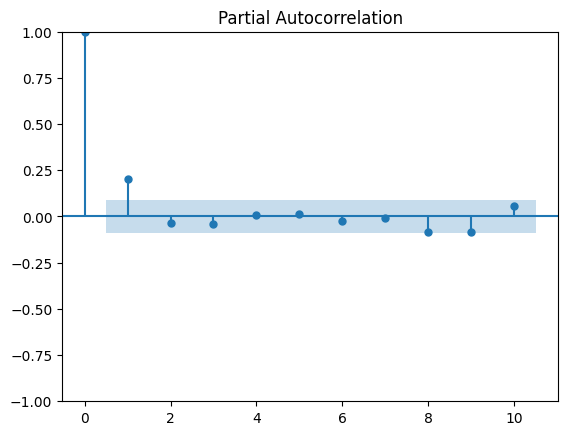

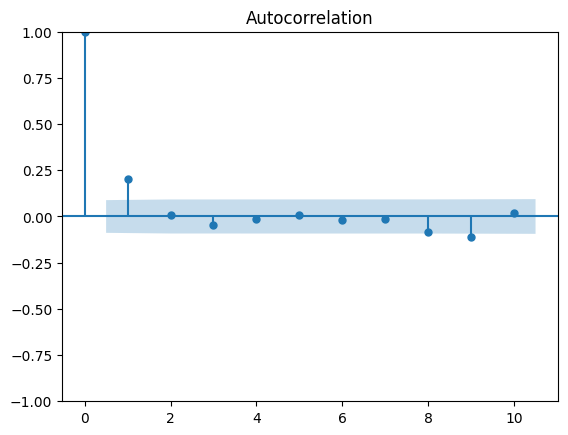

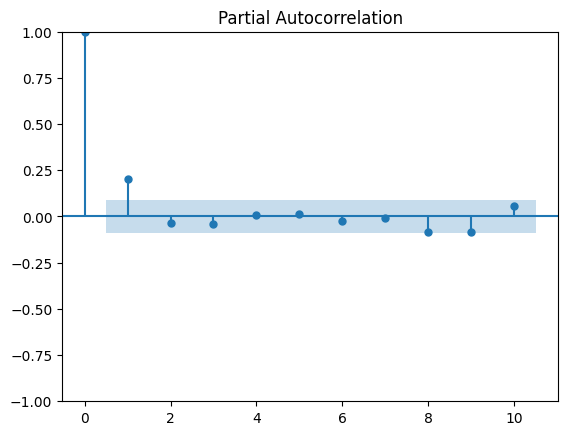

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_diffed, lags = 10)
plot_pacf(df_diffed, lags = 10)

In [18]:
d = 1 # одно дифференцирование
p = 2
q = 2

Построение модели ARIMA

In [19]:
split_date = '2025-05-01'
train = df_diffed.loc[:split_date]
test = df_diffed.loc[split_date:]

In [20]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2, 1, 2))
fitted_model = model.fit()

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
forecast_diff = fitted_model.forecast(steps = len(test))

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [22]:
last_train_value = df_clear.loc[train.index[-1], "usd_rub"]
forecast = forecast_diff.cumsum() + last_train_value

Сравнение предсказаний с тестовой выборкой

In [23]:
test_dates = df.loc['2025-05'].index
forecast.index = test_dates[:len(forecast)]
true_values = df_clear.loc[test_dates[:len(forecast)]]

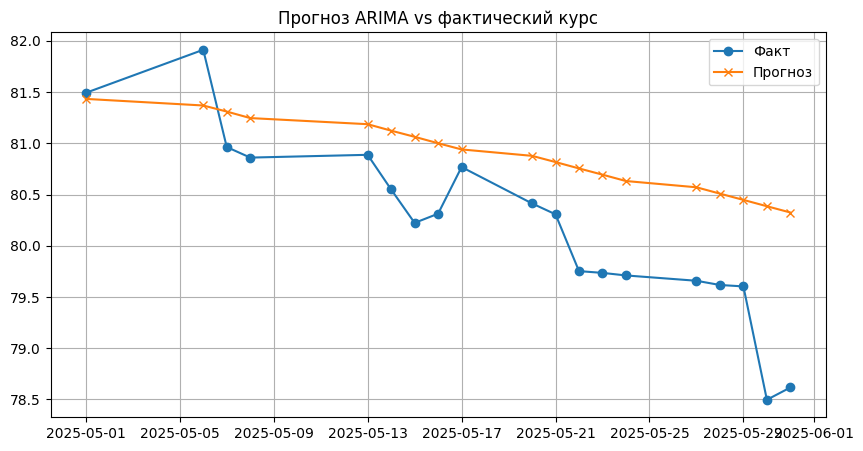

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(true_values.index, true_values.values, label='Факт', marker='o')
plt.plot(forecast.index, forecast.values, label='Прогноз', marker='x')
plt.title('Прогноз ARIMA vs фактический курс')
plt.legend()
plt.grid()
plt.show()

In [25]:
forecast_obj = fitted_model.get_forecast(steps = len(test))
forecast_mean = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()  # DataFrame с колонками 'lower y', 'upper y'

# Обновим индекс, если нужно:
forecast_mean.index = forecast.index
conf_int.index = forecast.index

last_train_value = df_clear.loc[train.index[-1], "usd_rub"]
forecast = forecast_mean.cumsum() + last_train_value
lower = conf_int.iloc[:, 0].cumsum() + last_train_value
upper = conf_int.iloc[:, 1].cumsum() + last_train_value

forecast.index = test_dates[:len(forecast)]
lower.index = forecast.index
upper.index = forecast.index

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


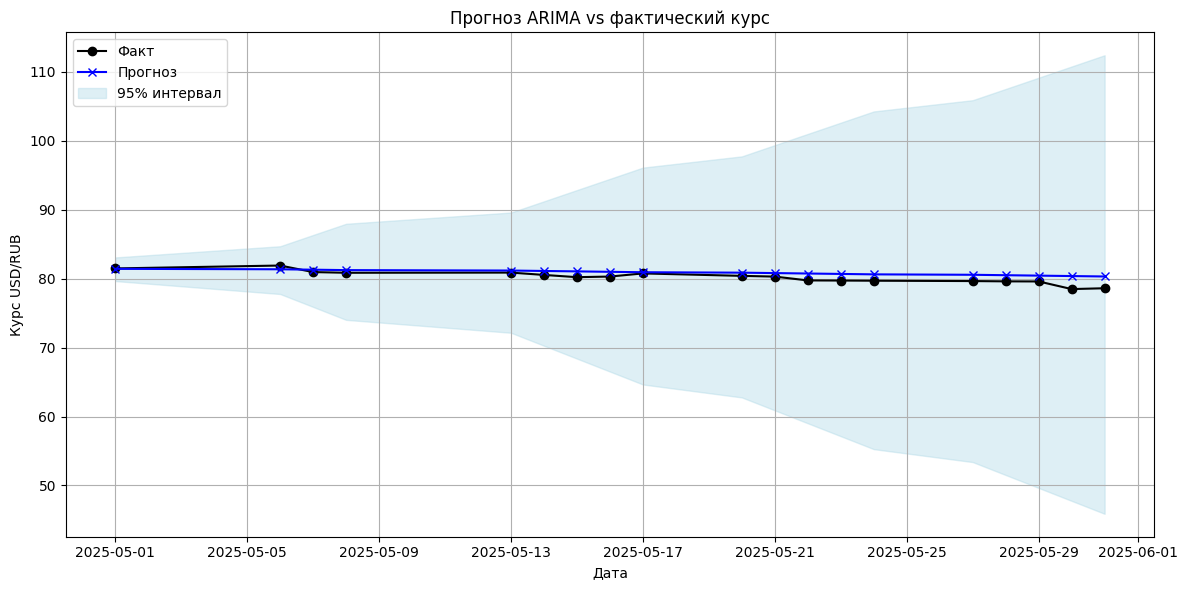

In [32]:
forecast_obj = fitted_model.get_forecast(steps = len(test))
forecast_mean = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

forecast_mean.index = forecast.index
conf_int.index = forecast.index

last_train_value = df_clear.loc[train.index[-1], "usd_rub"]
forecast = forecast_mean.cumsum() + last_train_value
lower = (conf_int.iloc[:, 0] + forecast_mean).cumsum() + last_train_value
upper = (conf_int.iloc[:, 1] + forecast_mean).cumsum() + last_train_value

forecast.index = test_dates[:len(forecast)]
lower.index = forecast.index
upper.index = forecast.index

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(true_values.index, true_values.values, label='Факт', marker='o', color='black')
plt.plot(forecast.index, forecast.values, label='Прогноз', marker='x', color='blue')

plt.fill_between(forecast.index, lower, upper, alpha=0.4, color='lightblue', label='95% интервал')


plt.title('Прогноз ARIMA vs фактический курс')
plt.xlabel('Дата')
plt.ylabel('Курс USD/RUB')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

mae = mean_absolute_error(true_values, forecast)
rmse = root_mean_squared_error(true_values, forecast)
print(f"MAE = {mae:.4f}, RMSE = {rmse:.4f}")

MAE = 0.7375, RMSE = 0.8668


Выводы:

В среднем модель ошибается примерно на 74 копейки;
Ошибки распределены достаточно равномерно (RMSE немного больше MAE → нет явно выбивающихся точек).
~0.84% относительной ошибки в среднем — довольно хороший результат.

При этом стремительно нарастает погрешность - вероятно, связано с большими колебаниями исходных данных (к примеру, конец 2024 года)